In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [26]:
# read csv
data = pd.read_csv('merged_data.csv')

epa_data = data[['CensusTract','Year','State','County','Pollutant Name','Total Cancer Risk (per million)']]

# remove rows with NaN values
epa_data = epa_data.dropna()

epa_data2019 = epa_data[epa_data['Year'] == 2019]
display(epa_data2019)


,CensusTract,Year,State,County,Pollutant Name,Total Cancer Risk (per million)
3,49001000000,2019,UT,Beaver,CARBON TETRACHLORIDE | FORMALDEHYDE,9.402811
10,49001100100,2019,UT,Beaver,CARBON TETRACHLORIDE | FORMALDEHYDE,9.498010
18,49001100200,2019,UT,Beaver,CARBON TETRACHLORIDE | FORMALDEHYDE,9.273508
23,49003000000,2019,UT,Box Elder,CARBON TETRACHLORIDE | FORMALDEHYDE,9.988514
30,49003960100,2019,UT,Box Elder,CARBON TETRACHLORIDE | FORMALDEHYDE,9.497319
...,...,...,...,...,...,...
4905,49057210900,2019,UT,Weber,BENZENE | CARBON TETRACHLORIDE | FORMALDEHYDE,13.087209
4913,49057211000,2019,UT,Weber,BENZENE | CARBON TETRACHLORIDE | FORMALDEHYDE,13.266395
4921,49057211100,2019,UT,Weber,BENZENE | CARBON TETRACHLORIDE | FORMALDEHYDE,13.263093
4929,49057211201,2019,UT,Weber,BENZENE | CARBON TETRACHLORIDE | FORMALDEHYDE,12.657148


In [44]:
# Load the GeoJSON file
geojson = gpd.read_file('CensusTracts2020.geojson')
geojson = geojson.rename(columns={'GEOID20':'CensusTract'})

# Ensure the GEOID column is the same type in both dataframes, typically a string
geojson['CensusTract'] = geojson['CensusTract'].astype(str)
epa_data2019['CensusTract'] = epa_data2019['CensusTract'].astype(str)

# Merge the data on the GEOID column
geo_merged = geojson.merge(epa_data2019, on='CensusTract', how='left')

# find null values
#display(geo_merged[geo_merged['Total Cancer Risk (per million)'].isnull()])

# set nan values to 0
#geo_merged = geo_merged.fillna(0)

#remove nan values
geo_merged = geo_merged.dropna()



#display(geo_merged.head(20))

/tmp/ipykernel_6596/2680018629.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epa_data2019['CensusTract'] = epa_data2019['CensusTract'].astype(str)


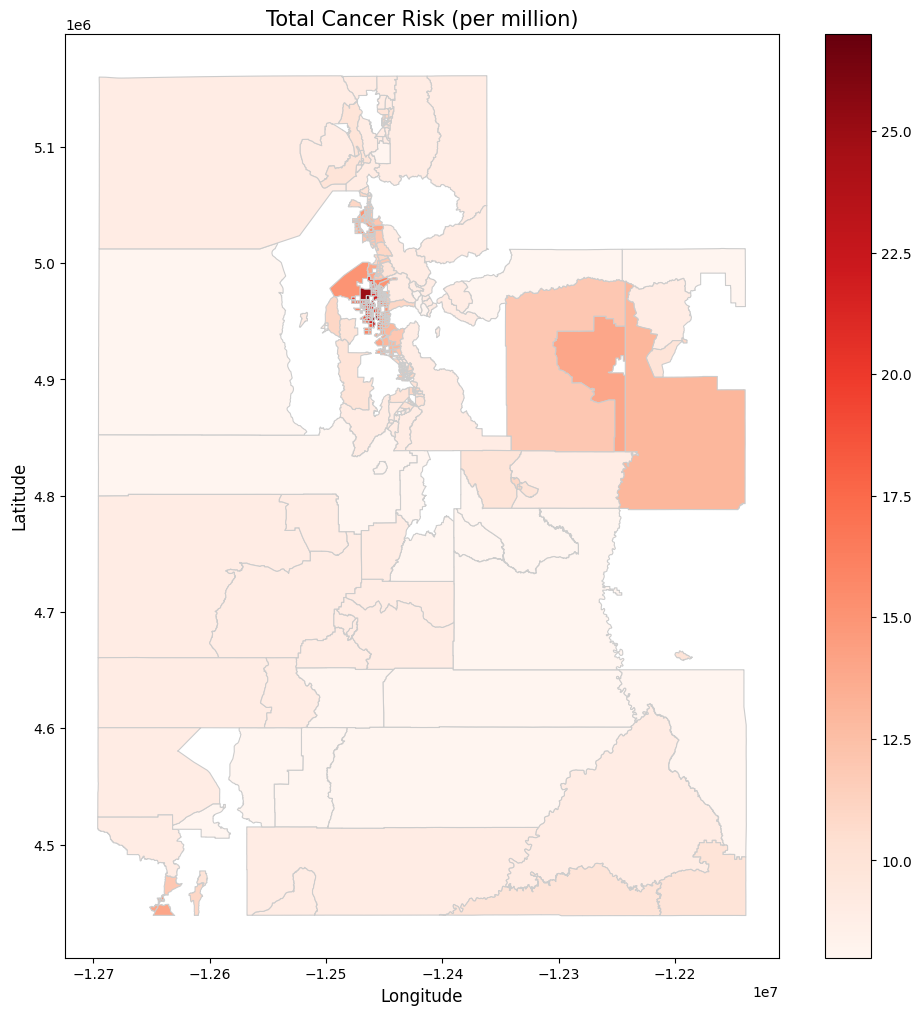

In [47]:
import matplotlib.pyplot as plt
from shapely.geometry import shape
import numpy as np
import matplotlib.colors as mcolors

# Assume 'POP100' is the population column and exists in the geojson DataFrame
geo_merged['Total Cancer Risk (per million)'] = geo_merged['Total Cancer Risk (per million)'].astype(int)

# Normalize population for color mapping and plot
norm = mcolors.Normalize(vmin=geo_merged['Total Cancer Risk (per million)'].min(), vmax=geo_merged['Total Cancer Risk (per million)'].max())
mapper = plt.cm.ScalarMappable(norm=norm, cmap='Blues')

# Plot using GeoPandas built-in plot function
fig, ax = plt.subplots(figsize=(12, 12))
geo_merged.plot(column='Total Cancer Risk (per million)', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Adding a color bar manually is redundant here because GeoPandas can add it automatically using legend=True
ax.set_title('Total Cancer Risk (per million)', fontsize=15)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

plt.show()